<a href="https://colab.research.google.com/github/Harrishart90/Daily-Stock-Market-Prediction.-Deep-Learning-projec/blob/main/Daily_Stock_Market_Prediction_Deep_Learning_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Lbraries

import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt




In [2]:
# LOAD DATASETS

import kagglehub
import os

path = kagglehub.dataset_download("aaron7sun/stocknews")
print(os.listdir(path))

file_path = os.path.join(path, "Combined_News_DJIA.csv")



100%|██████████| 5.82M/5.82M [00:00<00:00, 96.6MB/s]

Extracting files...


['Combined_News_DJIA.csv', 'RedditNews.csv', 'upload_DJIA_table.csv']


In [17]:
df = pd.read_csv(file_path)
df.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
df.shape

(1989, 27)

In [5]:
# Chceck if the Daily Stock Market Data making Headlines
# Use Variant Label
df.groupby("Label").size()


,0
Label,
0,924
1,1065


In [9]:
# Drop Date column if it exists
df = df.drop(columns=['Date'], errors='ignore')

# Encode class labels (Setosa, Versicolor, Virginica)
label_encoder = LabelEncoder()
df['Top1'] = label_encoder.fit_transform(df['Top1'])
df['Top2'] = label_encoder.fit_transform(df['Top2'])
df['Top3'] = label_encoder.fit_transform(df['Top3'])
df['Top4'] = label_encoder.fit_transform(df['Top4'])
df['Top5'] = label_encoder.fit_transform(df['Top5'])
df['Top6'] = label_encoder.fit_transform(df['Top6'])
df['Top7'] = label_encoder.fit_transform(df['Top7'])
df['Top8'] = label_encoder.fit_transform(df['Top8'])
df['Top9'] = label_encoder.fit_transform(df['Top9'])
df['Top10'] = label_encoder.fit_transform(df['Top10'])
df['Top11'] = label_encoder.fit_transform(df['Top11'])
df['Top12'] = label_encoder.fit_transform(df['Top12'])
df['Top13'] = label_encoder.fit_transform(df['Top13'])
df['Top14'] = label_encoder.fit_transform(df['Top14'])
df['Top15'] = label_encoder.fit_transform(df['Top15'])
df['Top16'] = label_encoder.fit_transform(df['Top16'])
df['Top17'] = label_encoder.fit_transform(df['Top17'])
df['Top18'] = label_encoder.fit_transform(df['Top18'])
df['Top19'] = label_encoder.fit_transform(df['Top19'])
df['Top20'] = label_encoder.fit_transform(df['Top20'])
df['Top21'] = label_encoder.fit_transform(df['Top21'])
df['Top22'] = label_encoder.fit_transform(df['Top22'])
df['Top23'] = label_encoder.fit_transform(df['Top23'])
df['Top24'] = label_encoder.fit_transform(df['Top24'])
df['Top25'] = label_encoder.fit_transform(df['Top25'])


# Split features (X) and labels (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Build The Neural Network

import warnings
warnings.filterwarnings('ignore')

model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=(25,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

# optional
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,952 (15.44 KB)

 Trainable params: 3,952 (15.44 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the Model

# If its classification, then
# 1. Optimizer -> adam
# 2. loss: sparse_categorical_crossentropy(More than 3 outputs/class ), binary_crossentropy(Two classes)
# 3. metrics -> accuracy

# Regression
# 1. optimizer -> adam
# 2. loss -> mean_sqaured_error
# 3. metric -> r2

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [13]:
# Train the Model

history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5293 - loss: 0.7113
Epoch 2/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5456 - loss: 0.6929
Epoch 3/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5861 - loss: 0.6735
Epoch 4/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5946 - loss: 0.6648
Epoch 5/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6235 - loss: 0.6478
Epoch 6/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6426 - loss: 0.6386
Epoch 7/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.6176
Epoch 8/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6697 - loss: 0.6143
Epoch 9/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7034 - loss: 0.5922
Epoch 10/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6919 - loss: 0.5818
Epoch 11/100
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7174 - loss: 0.5580
Epoch 12/100
199/199 ━━━━━━━━━━━━━━━━━━━━

In [14]:
# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Model Accuracy: {accuracy:.2f}')
print(f'Model Loss:{loss}')


Model Accuracy: 0.49
Model Loss:2.9612975120544434


In [15]:
# Make Predictions on the Model
predictions = model.predict(X_test[:5])
predictions
print('Predicted Classes:', np.argmax(predictions, axis=1))
print('Actual Classes:   ', y_test[:5].values)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Classes: [1 1 0 0 0]
Actual Classes:    [1 1 0 0 0]


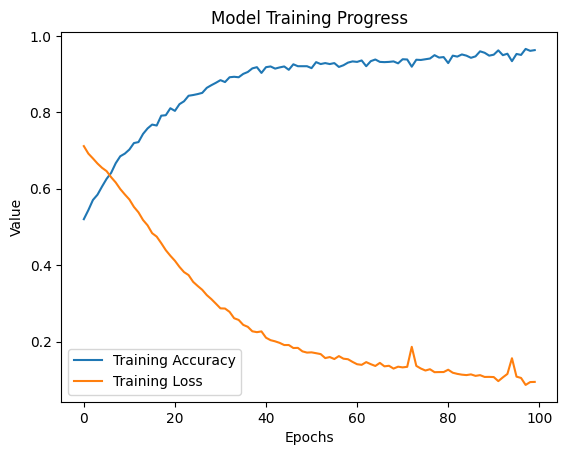

In [16]:
# Visualize the Training Progress

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()
